In [14]:
import random
import numpy as np
from multiprocessing import Process, Manager
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import count
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
plt.rcParams.update({'font.sans-serif':'Helvetica'})
plt.rcParams.update({'font.size': 18})

from matplotlib.backends.backend_pdf import PdfPages



In [19]:
dfff = pd.read_csv("../main_outcomes_overall.csv")

In [20]:
dfff

,race,treatment,outcome,effect,upper_conf,lower_conf,control_mean,treatment_mean,p_boot,p_mwu
0,all,MedianFamilyIncome,Fresh_FV,3.264983,0.659730,0.627033,0.651528,0.630928,0.000,4.099023e-02
1,all,MedianFamilyIncome,fast_food,-6.771646,0.804404,0.852874,0.342260,0.367120,0.000,1.145916e-04
2,all,MedianFamilyIncome,soda,-8.589246,1.813063,1.679658,0.022748,0.024886,0.000,1.219313e-02
3,all,MedianFamilyIncome,bmi,-0.334952,0.154826,0.152627,27.983173,28.077218,0.000,8.439747e-01
4,all,MedianFamilyIncome,bmi_abs,-0.094045,0.043512,0.042835,27.983173,28.077218,0.000,1.000000e+00
5,all,MedianFamilyIncome,ow,0.642506,0.503240,0.478775,0.651456,0.647297,0.006,7.170166e-01
6,all,no_college,Fresh_FV,9.179767,0.671325,0.653552,0.657296,0.602031,0.000,8.698482e-10
7,all,no_college,fast_food,-8.457245,0.844151,0.738545,0.339599,0.370973,0.000,6.247770e-05
8,all,no_college,soda,-13.833869,1.644609,1.628977,0.022377,0.025970,0.000,2.404711e-02
9,all,no_college,bmi,-5.053438,0.162420,0.166286,27.786901,29.265832,0.000,1.823766e-42


In [21]:
def getData(outcome, race):
    col = dfff[(dfff["outcome"]==outcome) & (dfff["race"]==race)]
    output= []
    for i, row in col.iterrows():
        label = ""
        if row["treatment"]=="MedianFamilyIncome":
            label = "High Income"
        if row["treatment"]=="no_college":
            label = "High Education"
        if row["treatment"]=="category_hotdogs_frac":
            label = "Low Fast Food\nRestaurant Access"
        if row["treatment"]=="lapophalfshare":
            label = "High Grocery\nStore Access"

        
        if outcome == "Fresh_FV":
            output.append((label,row["effect"],row["upper_conf"],row["lower_conf"]))
        else:
            output.append((label,-row["effect"],row["lower_conf"],row["upper_conf"]))

    return output

In [22]:
getData("Fresh_FV","all") 

[('High Income', 3.2649831794439703, 0.659729547729801, 0.627033320088786),
 ('High Education', 9.17976663359652, 0.671325314269698, 0.6535517497318221),
 ('Low Fast Food\nRestaurant Access',
  5.31108996550772,
  0.564293245156371,
  0.581815686503764),
 ('High Grocery\nStore Access',
  3.4374976486337996,
  0.625767766261272,
  0.5984965256484499)]

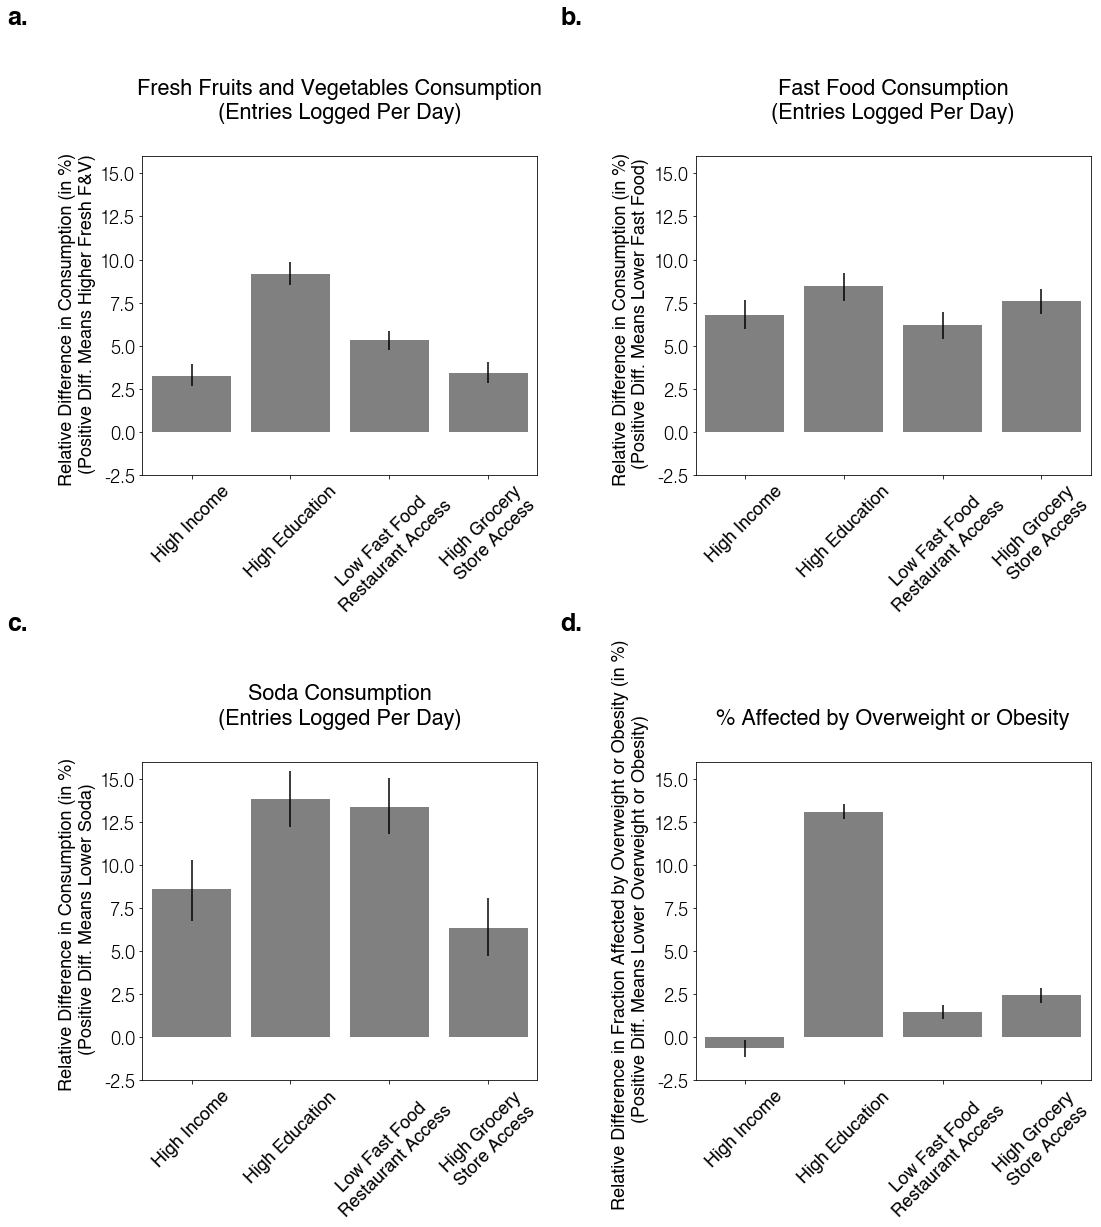

In [23]:
ticks_font = {'family':'Helveticalight','weight' : 'normal', 'size' : 18}

#All people halves
FreshFV = getData("Fresh_FV","all")
FastFood =  getData("fast_food","all")
Soda =  getData("soda","all")
BMI =  getData("ow","all")

fresh_fv_label = 'Relative Difference in Consumption (in %) \n (Positive Diff. Means Higher Fresh F&V)'
ff_label = 'Relative Difference in Consumption (in %) \n (Positive Diff. Means Lower Fast Food)'
soda_label = 'Relative Difference in Consumption (in %) \n (Positive Diff. Means Lower Soda)'
obese_label = 'Relative Difference in Fraction Affected by Overweight or Obesity (in %) \n (Positive Diff. Means Lower Overweight or Obesity)'


noCalibration = True
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(17, 17))

for graphFull in [(FreshFV,0,0,"Fresh Fruits and Vegetables Consumption\n(Entries Logged Per Day)",fresh_fv_label),(FastFood,0,1,"Fast Food Consumption\n(Entries Logged Per Day)",ff_label),(Soda,1,0,"Soda Consumption\n(Entries Logged Per Day)",soda_label),(BMI,1,1,"% Affected by Overweight or Obesity",obese_label)]:
    graph=graphFull[0]
    if noCalibration:
        graph=graphFull[0][:4]
    x = [z[0] for z in graph]
    y = [z[1] for z in graph]
    
    lower = [z[3] for z in graph]
    upper = [z[2] for z in graph]
    axs[graphFull[1],graphFull[2]].set_ylim(-2.5,16)
    axs[graphFull[1],graphFull[2]].set_ylabel(graphFull[4])
    axs[graphFull[1],graphFull[2]].set_yticklabels(axs[graphFull[1],graphFull[2]].get_yticks(), ticks_font)
    g = sns.barplot(x=x, y=y, color="grey",ax=axs[graphFull[1],graphFull[2]], data=None,**{'capsize':100,'yerr':[lower,upper]}).set_title(graphFull[3],y=1.1)
    
fig.subplots_adjust(hspace=.9)
fig.subplots_adjust(wspace=.4)


    
letters=['a.','b.','c.','d.']


for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=45)
    ax.annotate(letters.pop(0),(0, 1),xytext=(-135,150), fontname='Helveticabold',weight="bold" ,fontsize=25,xycoords='axes fraction',textcoords='offset points', ha='left', va='top')
    ax.xaxis.labelpad = 20


pp = PdfPages('../FigureOutputs/Figure4.pdf')
plt.savefig(pp, format='pdf', bbox_inches = 'tight')
pp.close()





### Generates Figure 4, but for top/bottom quartile matching experiments (in Supplementary Information)

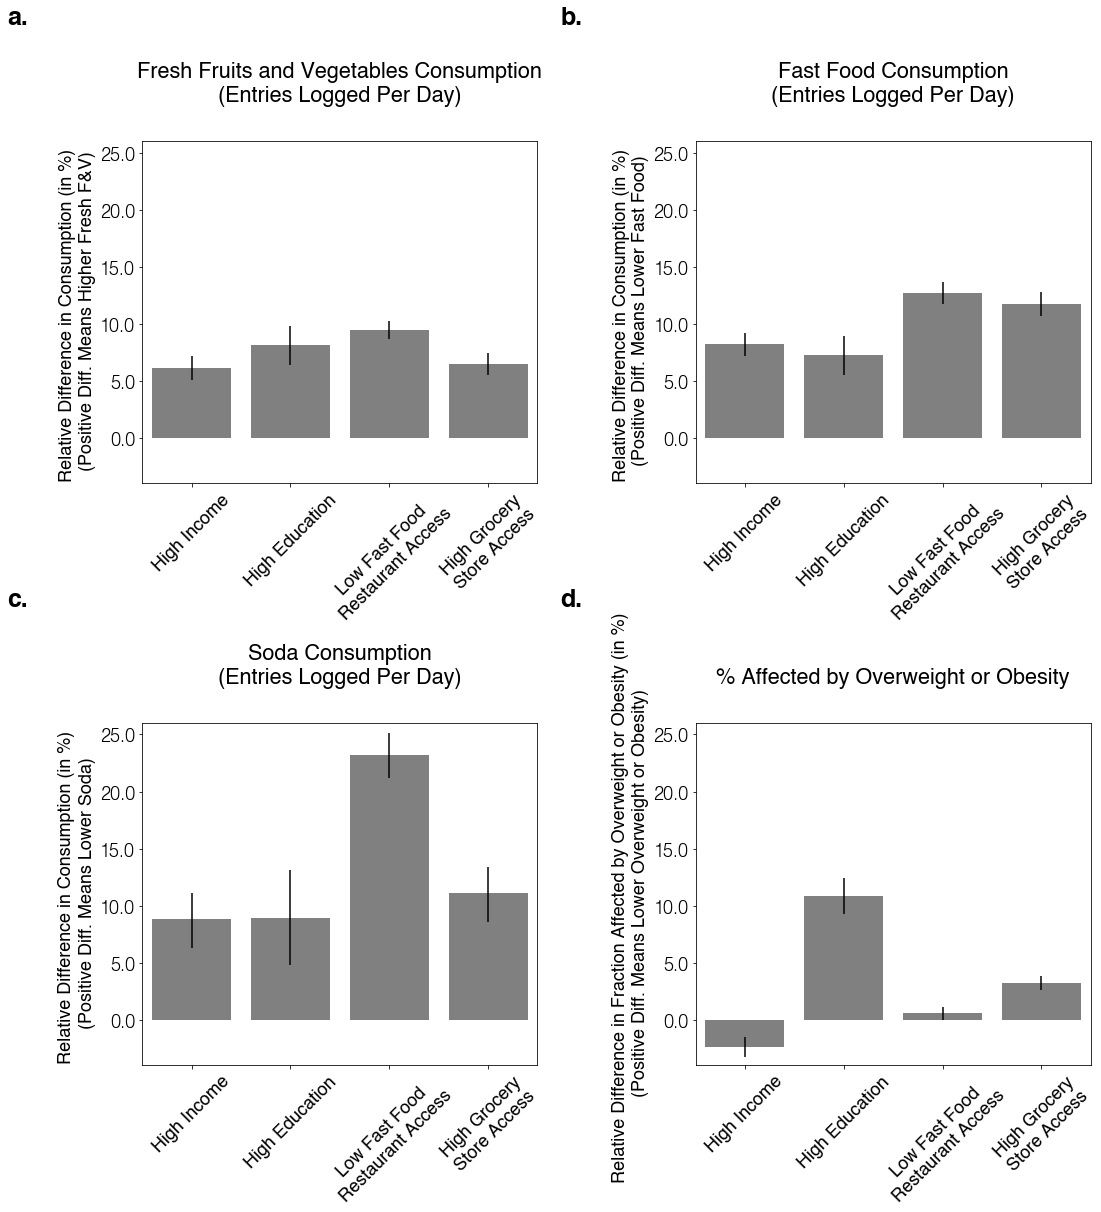

In [26]:
FreshFV = getData("Fresh_FV","all_25")
FastFood =  getData("fast_food","all_25")
Soda =  getData("soda","all_25")
BMI =  getData("ow","all_25")

noCalibration = True
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(17, 17))


fresh_fv_label = 'Relative Difference in Consumption (in %) \n (Positive Diff. Means Higher Fresh F&V)'
ff_label = 'Relative Difference in Consumption (in %) \n (Positive Diff. Means Lower Fast Food)'
soda_label = 'Relative Difference in Consumption (in %) \n (Positive Diff. Means Lower Soda)'


for graphFull in [(FreshFV,0,0,"Fresh Fruits and Vegetables Consumption\n(Entries Logged Per Day)",fresh_fv_label),(FastFood,0,1,"Fast Food Consumption\n(Entries Logged Per Day)",ff_label),(Soda,1,0,"Soda Consumption\n(Entries Logged Per Day)",soda_label),(BMI,1,1,"% Affected by Overweight or Obesity",obese_label)]:
    graph=graphFull[0]
    if noCalibration:
        graph=graphFull[0][:4]
    x = [z[0] for z in graph]
    y = [z[1] for z in graph]
    
    lower = [z[3] for z in graph]
    upper = [z[2] for z in graph]
    axs[graphFull[1],graphFull[2]].set_ylim(-4,26)
    axs[graphFull[1],graphFull[2]].set_ylabel(graphFull[4])
    axs[graphFull[1],graphFull[2]].set_yticklabels(axs[graphFull[1],graphFull[2]].get_yticks(), ticks_font)

    g = sns.barplot(x=x, y=y, color="grey",ax=axs[graphFull[1],graphFull[2]], data=None,**{'yerr':[lower,upper]}).set_title(graphFull[3],y=1.1)

fig.subplots_adjust(hspace=.7)
fig.subplots_adjust(wspace=.4)


    
letters=['a.','b.','c.','d.']


for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=45)
    ax.annotate(letters.pop(0),(0, 1),xytext=(-135,135), fontname='Helveticabold',weight="bold" ,fontsize=25,xycoords='axes fraction',textcoords='offset points', ha='left', va='top')
    ax.xaxis.labelpad = 20

pp = PdfPages('../FigureOutputs/Figure4_quartiles.pdf')
plt.savefig(pp, format='pdf')
pp.close()